In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("D:/MI sklearn/dataset numerical/archive/Wine_Quality_Data.csv")
dataframe.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
dataframe.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [4]:
print(dataframe.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [6]:
dataframe['color'] = label_encoder.fit_transform(dataframe['color'])

In [7]:
dataframe.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [8]:
# see unique values of quality column
set(dataframe['color'])

{0, 1}

In [9]:
features = dataframe.drop(columns='color', axis=1)
target = dataframe['color']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#split data 
features_train, features_test, target_train, target_test = train_test_split(features, target ,test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(features_train, target_train)


DecisionTreeClassifier()

In [13]:
y_pred = model.predict(features_test)

In [14]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

[Text(0.4191958778782895, 0.975, 'x[6] <= 65.5\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.10855263157894737, 0.925, 'x[4] <= 0.046\ngini = 0.16\nsamples = 1082\nvalue = [987, 95]'),
 Text(0.05263157894736842, 0.875, 'x[6] <= 20.0\ngini = 0.19\nsamples = 94\nvalue = [10, 84]'),
 Text(0.02631578947368421, 0.825, 'x[4] <= 0.036\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.013157894736842105, 0.775, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.039473684210526314, 0.775, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.07894736842105263, 0.825, 'x[8] <= 3.755\ngini = 0.091\nsamples = 84\nvalue = [4, 80]'),
 Text(0.06578947368421052, 0.775, 'x[7] <= 0.995\ngini = 0.048\nsamples = 82\nvalue = [2, 80]'),
 Text(0.05263157894736842, 0.725, 'gini = 0.0\nsamples = 76\nvalue = [0, 76]'),
 Text(0.07894736842105263, 0.725, 'x[3] <= 4.75\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.06578947368421052, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Te

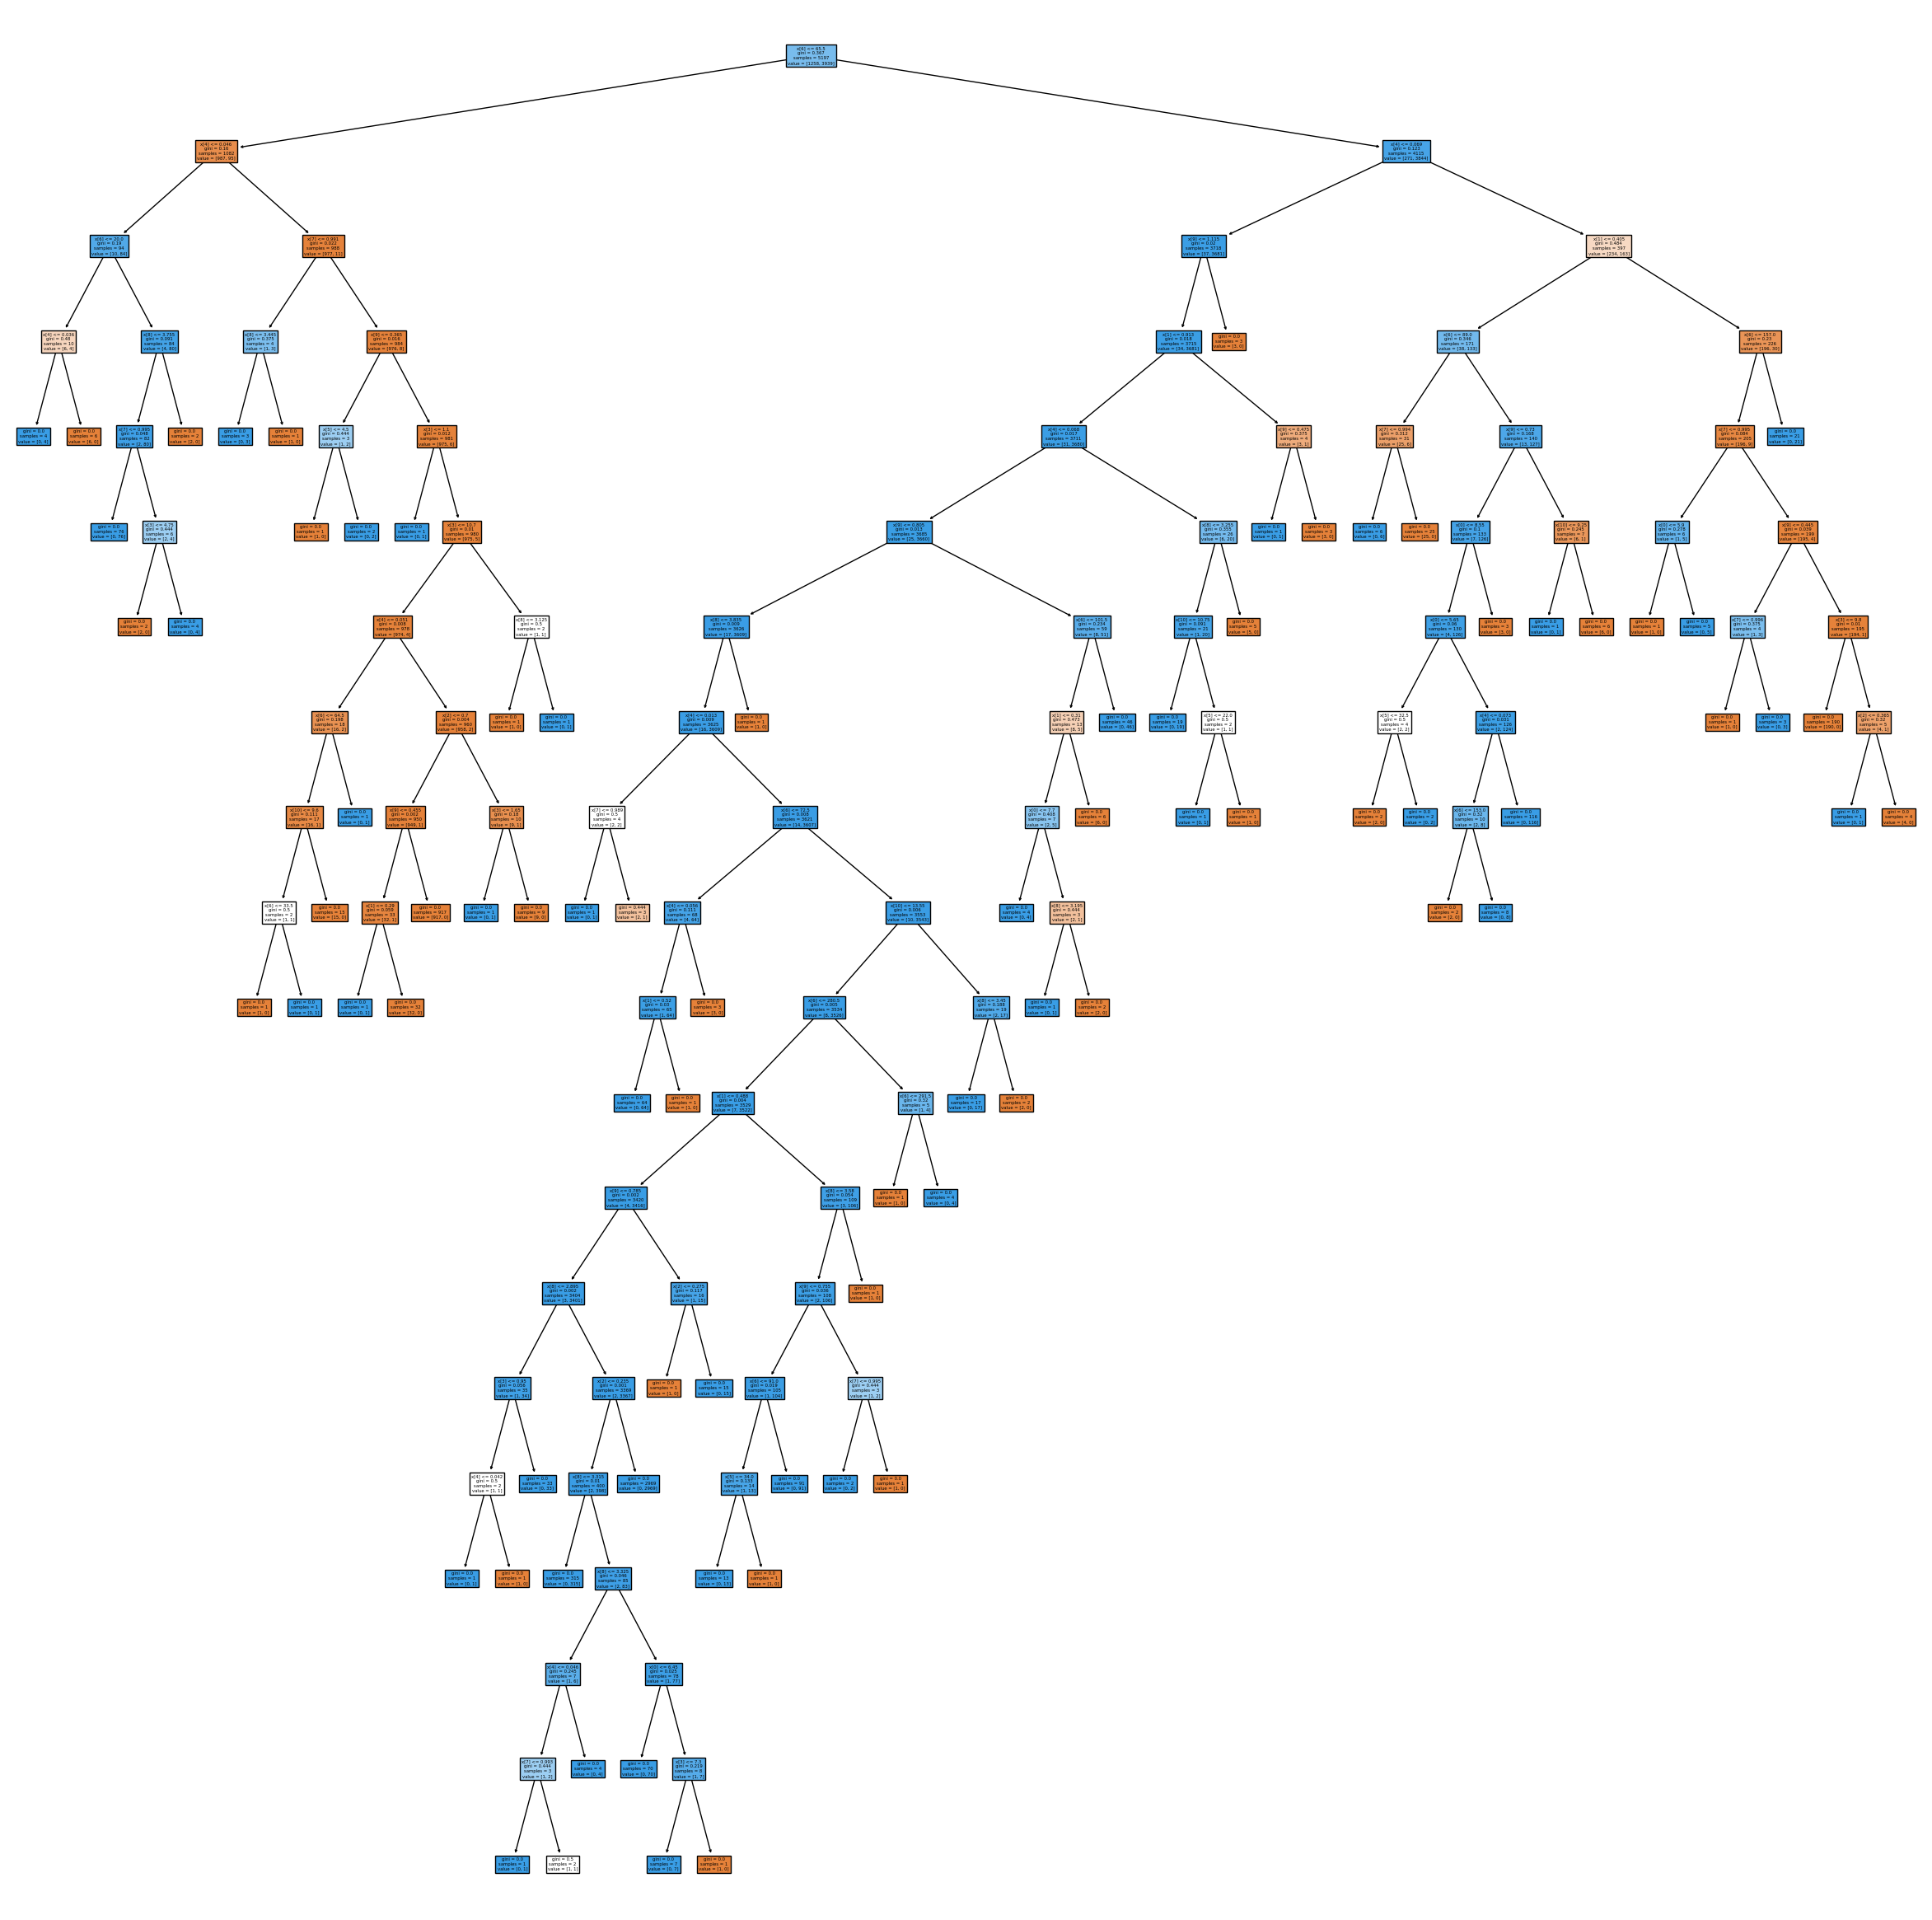

In [15]:
from sklearn import tree
plt.figure(figsize=(30, 30))
tree.plot_tree(model, filled=True)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9815384615384616


In [17]:
model.score(features,target)

0.9959981529936894

In [18]:
#calculate the accuracy 
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy= accuracy_score( y_pred , target_test)
print("\n Accuracy of Decision Tree Classifier: ",accuracy)
print('\n////////////////////////////////////////////////////////////////////////////////////////// \n')
print("Confusion Matrix as Array \n")
conf_matrix = confusion_matrix(target_test, y_pred)
print(conf_matrix)


 Accuracy of Decision Tree Classifier:  0.9815384615384616

////////////////////////////////////////////////////////////////////////////////////////// 

Confusion Matrix as Array 

[[329  12]
 [ 12 947]]


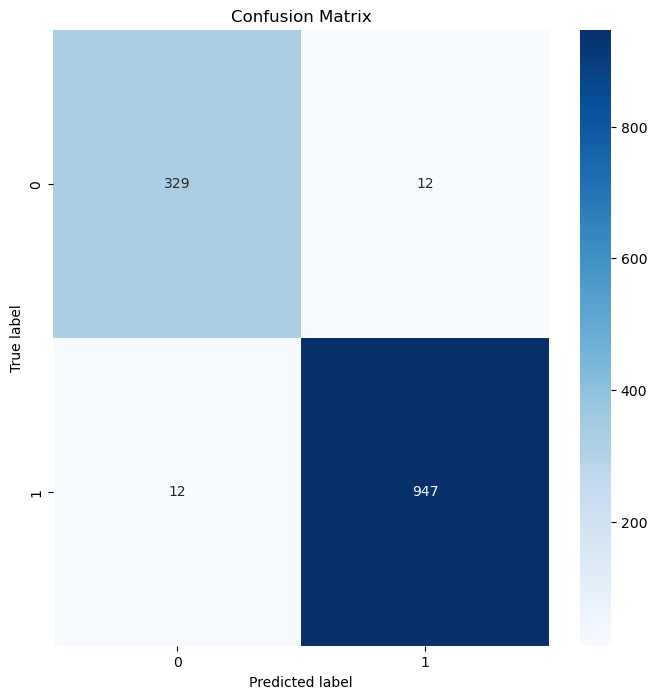

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(target_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

C:\Users\LAP TECH\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LAP TECH\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LAP TECH\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LAP TECH\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LAP TECH\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\LAP TECH\anaconda3\Li

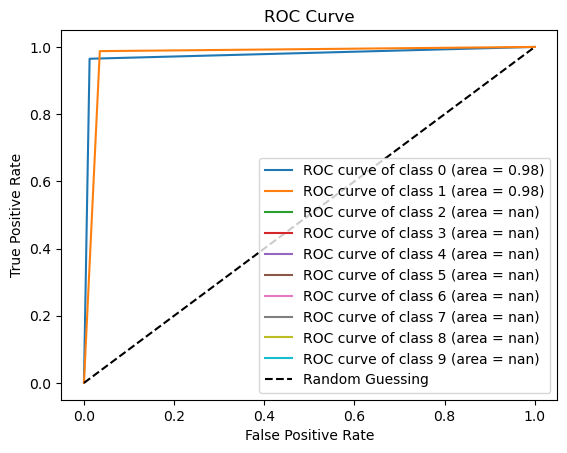

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming target_test contains the true labels and model is your trained classifier
y_predict = model.predict(features_test)
y_test = np.array(target_test)
y_predict = np.array(y_pred)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):  # Change num_classes to the number of classes in your dataset
    fpr[i], tpr[i], _ = roc_curve(target_test == i, y_pred == i)  # Binary classification problem for class i
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

for i in range(10):  # Change num_classes to the number of classes in your dataset
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Apply same model for saample from dataframe to see tree figure
sampleData = dataframe.head(1700)
sampleData

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,1
1696,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,1
1697,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,1
1698,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,1


In [22]:
features_sample = sampleData.drop(columns='color', axis=1)
target_sample = sampleData['color']

In [23]:
sampleModel = DecisionTreeClassifier()
sampleModel.fit(features_sample, target_sample)

DecisionTreeClassifier()

[Text(0.5646551724137931, 0.9444444444444444, 'x[6] <= 131.5\ngini = 0.112\nsamples = 1700\nvalue = [1599, 101]'),
 Text(0.28448275862068967, 0.8333333333333334, 'x[4] <= 0.046\ngini = 0.048\nsamples = 1600\nvalue = [1561, 39]'),
 Text(0.13793103448275862, 0.7222222222222222, 'x[8] <= 3.34\ngini = 0.496\nsamples = 53\nvalue = [29, 24]'),
 Text(0.06896551724137931, 0.6111111111111112, 'x[6] <= 56.5\ngini = 0.375\nsamples = 28\nvalue = [7, 21]'),
 Text(0.034482758620689655, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.10344827586206896, 0.5, 'x[4] <= 0.02\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.06896551724137931, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.13793103448275862, 0.3888888888888889, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.20689655172413793, 0.6111111111111112, 'x[1] <= 0.21\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.1724137931034483, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2413

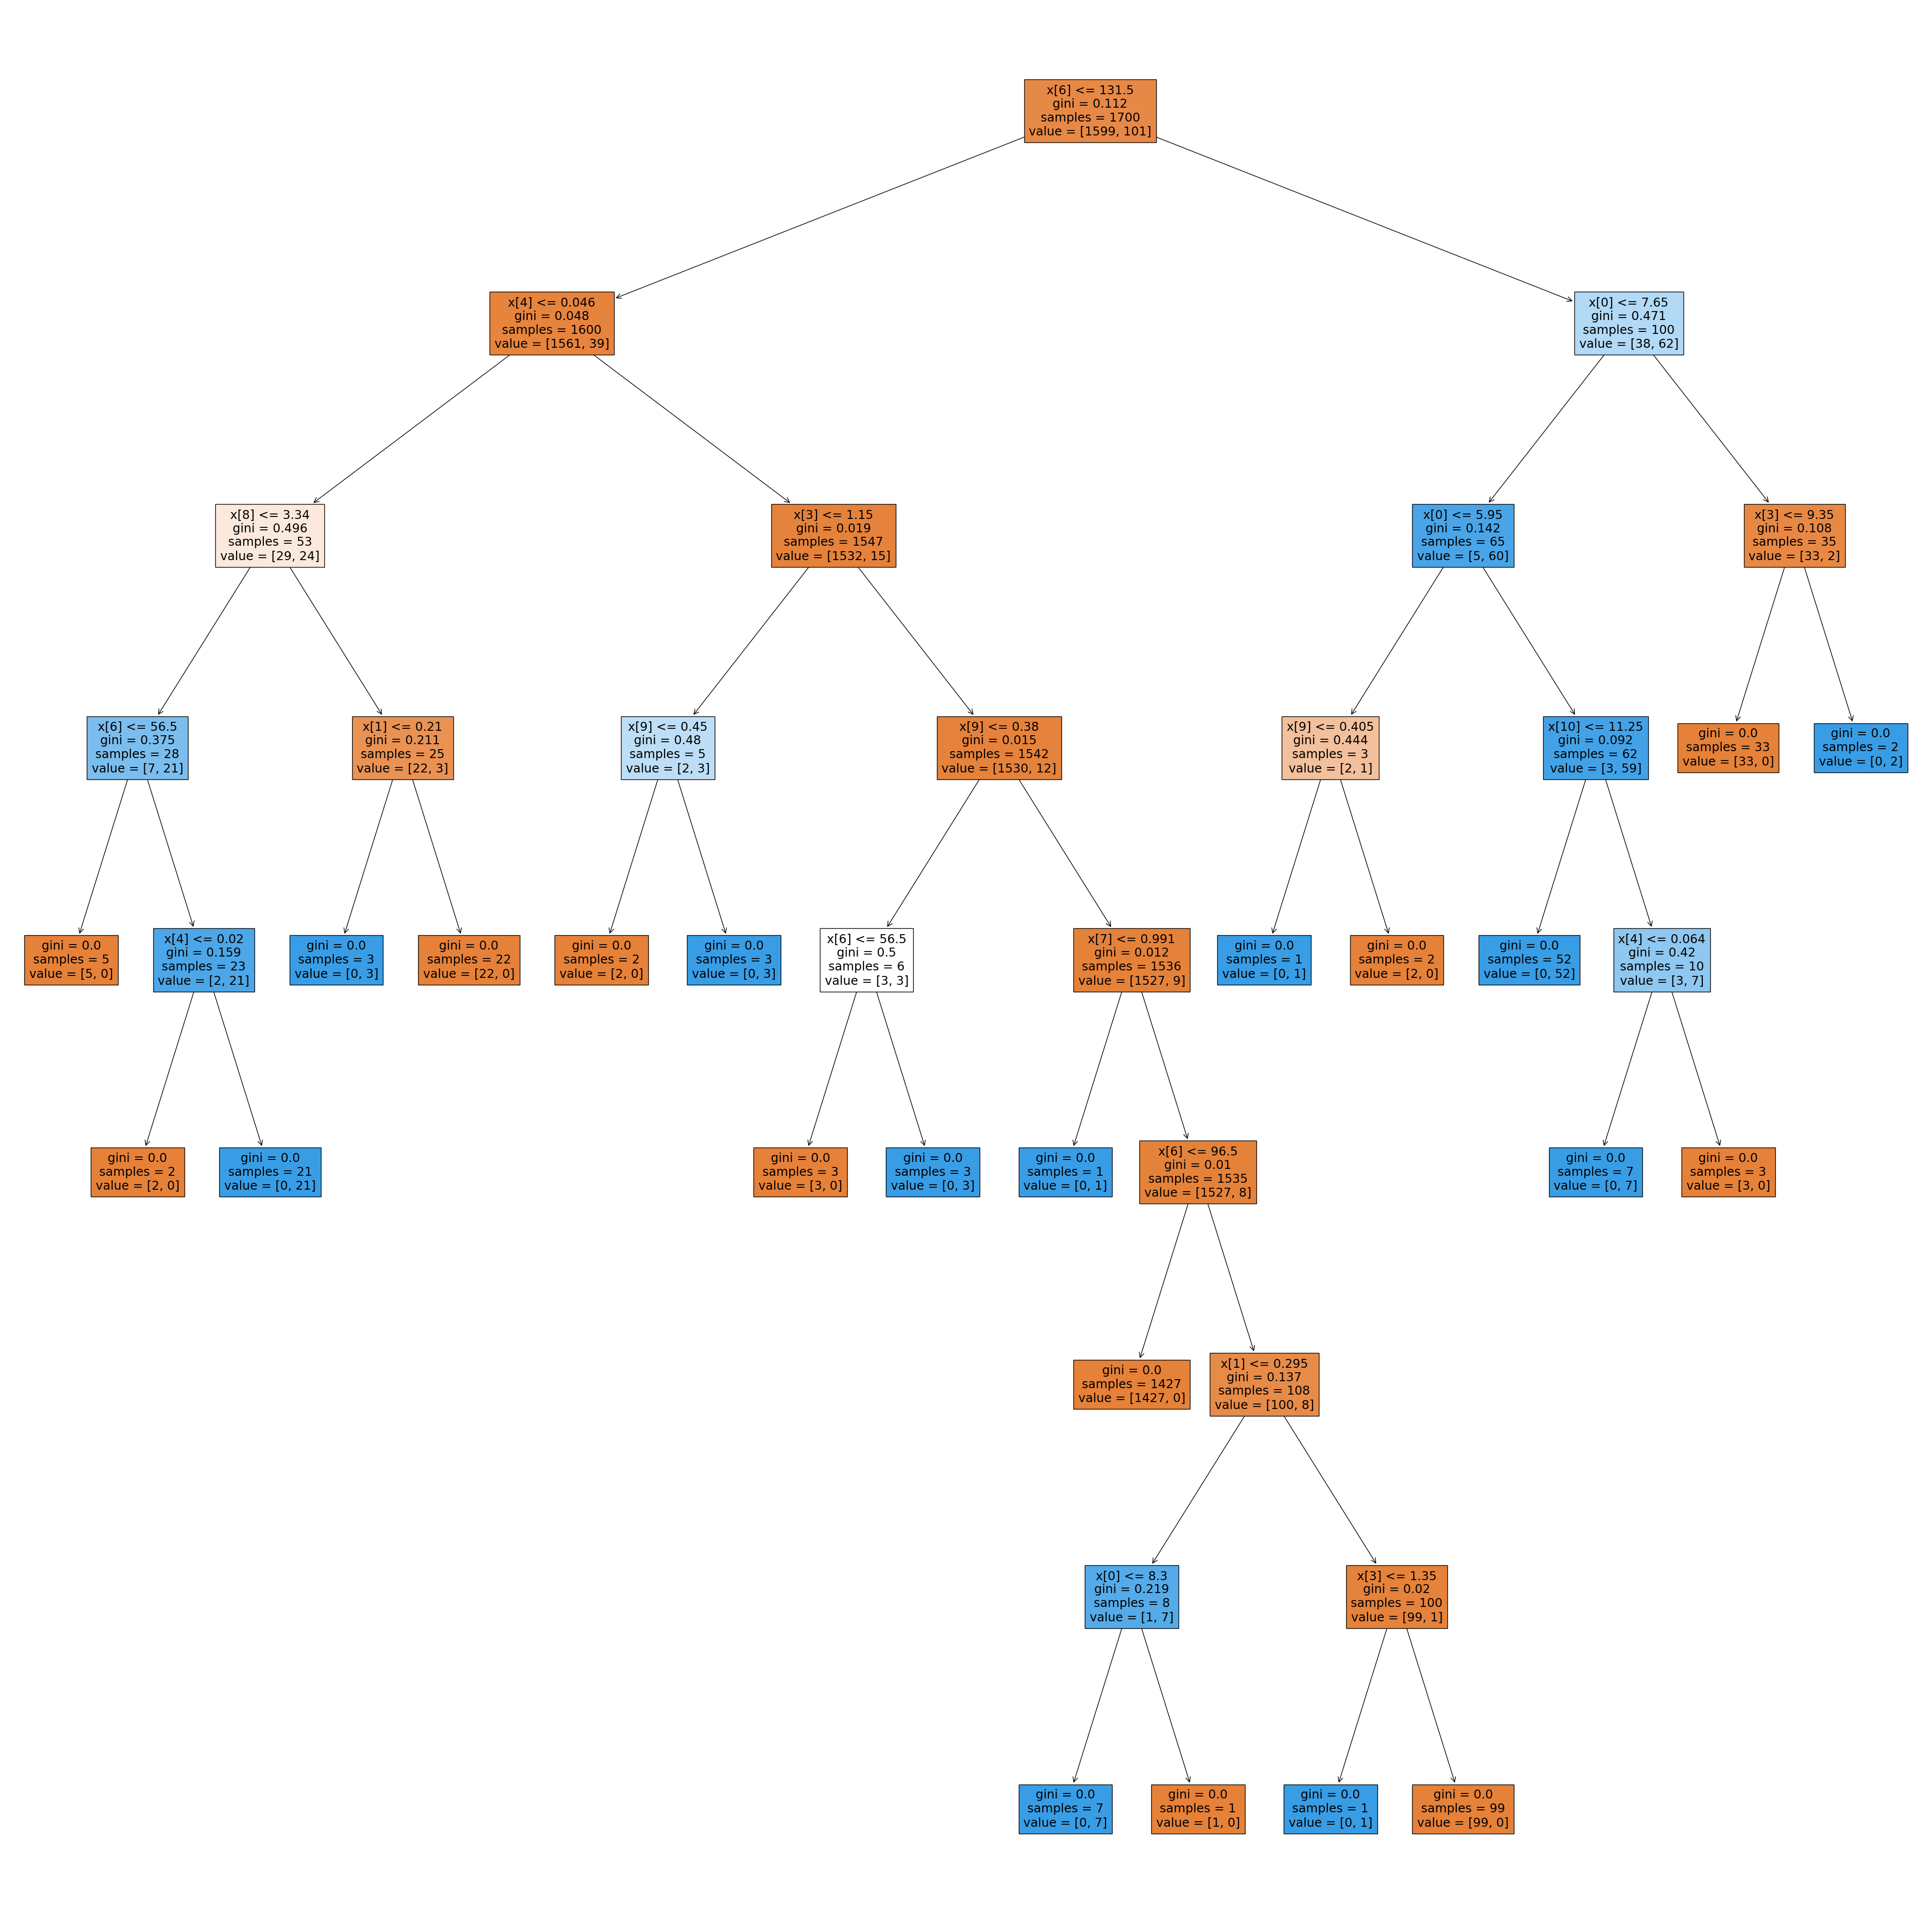

In [24]:
from sklearn import tree
plt.figure(figsize=(50, 50))
tree.plot_tree(sampleModel, filled=True)

In [25]:
set(sampleData.color)

{0, 1}

In [26]:
#gui
from tkinter import *
from tkinter import messagebox
import joblib
joblib.dump(model,"color.joblib")

['color.joblib']

In [ ]:

class Wine_Quality_Data:
    def __init__(self, gui):
        self.gui = gui
        self.gui.title("Wine Quality Data")
        self.gui.geometry("700x550")
        self.gui.configure(bg="lightblue")
        gui.resizable(False, False)

        self.create_widgets()

        self.model = joblib.load("color.joblib")

    def create_widgets(self):
        self.header = Label(self.gui, text="Predict House Price", font="arial 18 bold", bg="lightblue", fg="black")
        self.header.pack(pady=20)

        self.frame1 = Frame(self.gui, bg="lightblue")
        self.frame1.pack()

        labels = ["fixed_acidity:", "volatile_acidity:", "citric_acid:", "residual_sugars:", "chlorides:",
                  "free_sulfur_dioxide:", "total_sulfur_dioxide:", "density:", "pH:", "sulphates:", "alcohol:", "quality:"]
        self.entries = []

        for i, label_text in enumerate(labels):
            row = i // 2  
            column = i % 2 * 2  
            label = Label(self.frame1, text=label_text, font=(None, 12), bg="lightblue", fg="black")
            label.grid(row=row, column=column, padx=10, pady=10, sticky="e")

            entry = Entry(self.frame1, bg="gray", fg="white")
            entry.grid(row=row, column=column+1, padx=10, pady=10, sticky="w")
            self.entries.append(entry)
            entry.bind("<Down>", lambda event, index=i: self.move_focus(event, index))
            entry.bind("<Up>", lambda event, index=i: self.move_focus(event, index))
            entry.bind("<Right>", lambda event, index=i: self.move_focus(event, index))
            entry.bind("<Left>", lambda event, index=i: self.move_focus(event, index))


        bt = Button(self.gui, text="Predict", width=10, height=3 , command=self.predict)
        bt.place(x=150,y=450)
        self.clear_button = Button(self.gui, text="Clear", width=10, height=3 ,command=self.clear_entries)
        self.clear_button.place(x=480,y=450)

        self.result_label = Label(self.gui, text="", font=(None, 12), bg="lightblue", fg="black")
        self.result_label.pack(pady=20)

    def predict(self):
        values = [float(entry.get()) for entry in self.entries]
        prediction = self.model.predict([values])[0]
        if prediction == 0:
            prediction = "red"
        elif prediction == 1:
            prediction = "white"

        self.result_label.config(text=f"color: {prediction}")
    def clear_entries(self):
        for entry in self.entries:
            entry.delete(0, END)
    def move_focus(self, event, index):
        if event.keysym == 'Down':
            index = (index + 1) % len(self.entries)
        elif event.keysym == 'Up':
            index = (index - 1) % len(self.entries)
        elif event.keysym == 'Right':
            index = (index + 1) % len(self.entries)
        elif event.keysym == 'Left':
            index = (index - 1) % len(self.entries)
        self.entries[index].focus_set()  


if __name__ == "__main__":
    root = Tk()
    app = Wine_Quality_Data(root)
    root.mainloop()
